# CIS Introduction

CIS has it's own version of the Iris Cube. But it's designed to work with any observational data. The CIS data structure is just called UngriddedData:

<img src="../images/ungridded_data.png" width="640"/>

First create a variable which points to the example data

In [2]:
shared_data_path = '/mnt/efs/fs1/Data_Analysis_In_Python/Data/'

In [3]:
from cis import read_data, read_data_list, get_variables

get_variables(shared_data_path+'Aeronet/920801_150530_Brussels.lev20')

{'340-440Angstrom',
 '380-500Angstrom',
 '440-675Angstrom',
 '440-675Angstrom(Polar)',
 '440-870Angstrom',
 '500-870Angstrom',
 'AOT_1020',
 'AOT_1640',
 'AOT_340',
 'AOT_380',
 'AOT_412',
 'AOT_440',
 'AOT_443',
 'AOT_490',
 'AOT_500',
 'AOT_531',
 'AOT_532',
 'AOT_551',
 'AOT_555',
 'AOT_667',
 'AOT_675',
 'AOT_870',
 'Julian_Day',
 'Last_Processing_Date(ddmmyyyy)',
 'Solar_Zenith_Angle',
 'TripletVar_1020',
 'TripletVar_1640',
 'TripletVar_340',
 'TripletVar_380',
 'TripletVar_412',
 'TripletVar_440',
 'TripletVar_443',
 'TripletVar_490',
 'TripletVar_500',
 'TripletVar_531',
 'TripletVar_532',
 'TripletVar_551',
 'TripletVar_555',
 'TripletVar_667',
 'TripletVar_675',
 'TripletVar_870',
 'Water(cm)',
 'WaterError',
 'date',
 'time'}

In [4]:
aeronet_aot_500 = read_data(shared_data_path+"Aeronet/920801_150530_Brussels.lev20", "AOT_500")
print(aeronet_aot_500)

Ungridded data: AOT_500 / (1) 
     Shape = (15573,)

     Total number of points = 15573
     Number of non-masked points = 15573
     Long name = AOT_500
     Standard name = None
     Units = 1
     Missing value = -999.0
     Range = (0.01864, 1.470992)
     History = 
     Coordinates: 
       longitude
          Long name = 
          Standard name = longitude
          Units = degrees_east
          Missing value = None
          Range = (4.35, 4.35)
          History = 
       latitude
          Long name = 
          Standard name = latitude
          Units = degrees_north
          Missing value = None
          Range = (50.783, 50.783)
          History = 
       altitude
          Long name = 
          Standard name = altitude
          Units = meters
          Missing value = None
          Range = (120.0, 120.0)
          History = 
       time
          Long name = 
          Standard name = time
          Units = days since 1600-01-01 00:00:00
          Missing value =

In [5]:
aeronet_aot_500.name()

'AOT_500'

## Some example datasets

In [6]:
%matplotlib inline

### Ungridded time series data

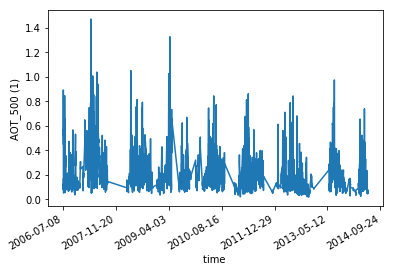

In [7]:
aeronet_aot_500.plot()

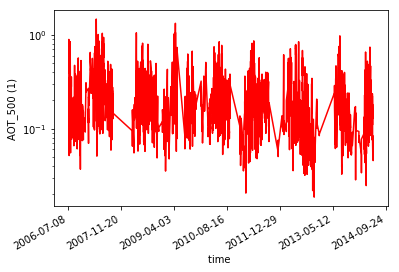

In [8]:
ax = aeronet_aot_500.plot(color='red')
ax.set_yscale('log')

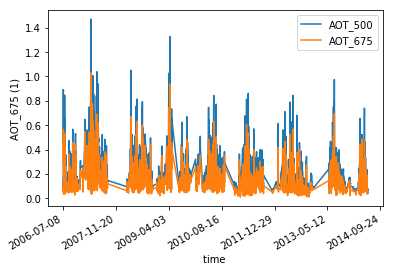

In [9]:
aeronet_aot = read_data_list(shared_data_path+"Aeronet/920801_150530_Brussels.lev20", 
                             ['AOT_500', 'AOT_675'])
ax = aeronet_aot.plot()

In [10]:
ax.set_title('Brussels Aeronet AOT')
ax.set_xlabel('Date')

Text(0.5,17.2,'Date')

In [11]:
from datetime import datetime 
ax.set_xlim(datetime(2007,5,5), datetime(2007,8,26))    

(732801.0, 732914.0)

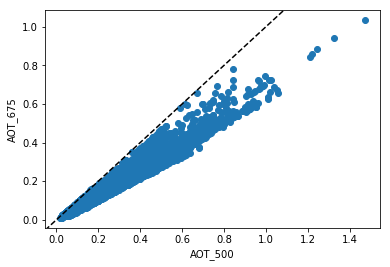

In [12]:
aeronet_aot.plot(how='comparativescatter')
# Note that this will only work if we have two datasets in our list

### Subsetting

CIS is able to `subset` datasets across any of the given coordinates

In [13]:
aeronet_aot_2007 = aeronet_aot.subset(t=[datetime(2007,1,1), datetime(2007,12,31)])
aeronet_aot_2007

[<cis 'UngriddedData' of Ungridded data: AOT_500 / (1) 
>,
<cis 'UngriddedData' of Ungridded data: AOT_675 / (1) 
>]

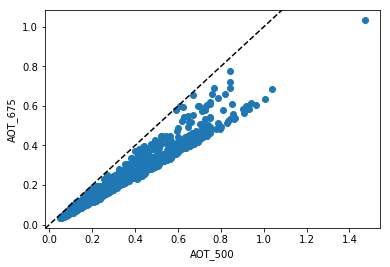

In [14]:
aeronet_aot_2007.plot(how='comparativescatter')

### Model time series

In [15]:
model_aod = read_data(shared_data_path+"od550aer.nc", "od550aer")

In [17]:
print(model_aod)

Optical thickness - total 550nm / (1) (time: 1464; latitude: 96; longitude: 192)
     Dimension coordinates:
          time                             x               -              -
          latitude                         -               x              -
          longitude                        -               -              x
     Attributes:
          CDI: Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.0
          advection: Lin & Rood
          date_time: 20140613 051140
          echam_version: 6.1.00
          grid_type: gaussian
          history: Fri Dec 04 17:15:40 2015: cdo -r copy od550aer.nc ../../temp.nc
Tue Jul...
          host_name: p101
          institution: Max-Planck-Institute for Meteorology
          jsbach_version: 2.01
          operating_system: AIX 6.1 Power6
          physics: Modified ECMWF physics
          radiation: Modified E

In [18]:
import iris.analysis
maod_global_mean, = model_aod.collapsed(['longitude', 'latitude'], iris.analysis.MEAN)

/opt/tljh/user/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [19]:
print(maod_global_mean)

Optical thickness - total 550nm / (1) (time: 1464)
     Dimension coordinates:
          time                             x
     Scalar coordinates:
          latitude: 0.0 degrees, bound=(-89.49698729367682, 89.49698729367682) degrees
          longitude: 179.0625 degrees, bound=(-0.9375, 359.0625) degrees
     Attributes:
          CDI: Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.0
          advection: Lin & Rood
          date_time: 20140613 051140
          echam_version: 6.1.00
          grid_type: gaussian
          history: Fri Dec 04 17:15:40 2015: cdo -r copy od550aer.nc ../../temp.nc
Tue Jul...
          host_name: p101
          institution: Max-Planck-Institute for Meteorology
          jsbach_version: 2.01
          operating_system: AIX 6.1 Power6
          physics: Modified ECMWF physics
          radiation: Modified ECMWF radiation
          tit

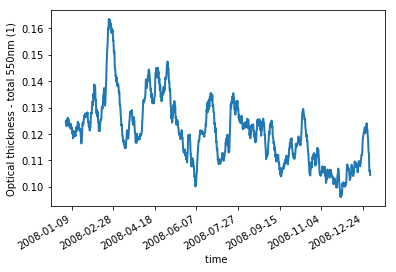

In [24]:
ax = maod_global_mean.plot(itemwidth=2)

In [29]:

aeronet_aot_500.plot(ax=ax)

### Aircraft data

In [30]:
number_concentration = read_data(shared_data_path+'/ARCPAC_2008', 
                                 'NUMBER_CONCENTRATION')
print(number_concentration)

Ungridded data: NUMBER_CONCENTRATION / (1/cm3) 
     Shape = (1269,)

     Total number of points = 1269
     Number of non-masked points = 1269
     Long name = 
     Standard name = None
     Units = 1/cm3
     Missing value = -9999
     Range = (-9999.0, 2191.0)
     History = 
     Misc attributes: 
       Missing_Value = -9999
     Coordinates: 
       time
          Long name = 
          Standard name = time
          Units = days since 1600-01-01 00:00:00
          Missing value = -9999
          Range = (cftime.DatetimeGregorian(2008, 4, 11, 20, 1, 30, 0), cftime.DatetimeGregorian(2008, 4, 16, 3, 3, 30, 0))
          History = 
          Misc attributes: 
            Missing_Value = -9999
       latitude
          Long name = 
          Standard name = latitude
          Units = degrees
          Missing value = -9999
          Range = (-9999.0, 75.1286)
          History = 
          Misc attributes: 
            Missing_Value = -9999
       longitude
          Long name = 
 

In [31]:
import numpy as np
# Fix the maks on the data....
number_concentration.data = np.ma.masked_less(number_concentration.data, 0.)

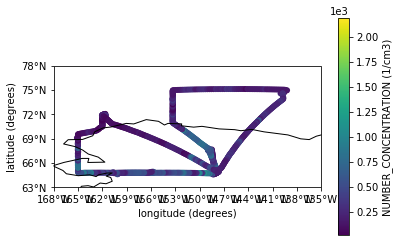

In [32]:
ax = number_concentration.plot()

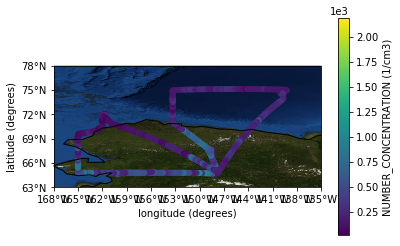

In [37]:
ax=number_concentration.plot()
ax.bluemarble()
#ax.set_global()


### Satellite data

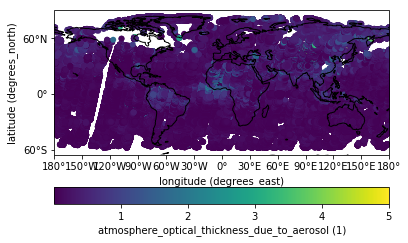

In [38]:
aerosol_cci = read_data(shared_data_path+'/AerosolCCI', 'AOD550')
aerosol_cci.plot()

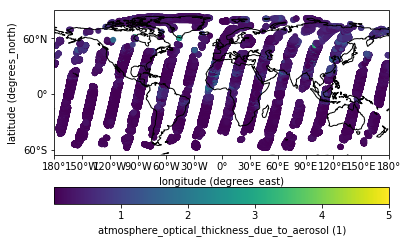

In [39]:
aerosol_cci_one_day = read_data(shared_data_path+'AerosolCCI/20080415*.nc', 'AOD550')
ax = aerosol_cci_one_day.plot()

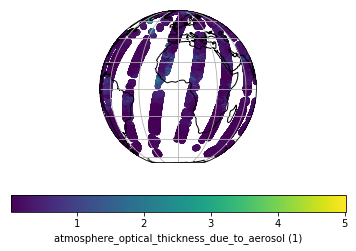

In [40]:
aerosol_cci_one_day.plot(projection='Orthographic')

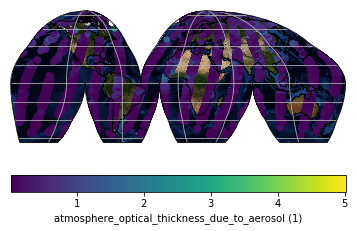

In [41]:
ax=aerosol_cci_one_day.plot(projection='InterruptedGoodeHomolosine')
ax.bluemarble()

## Aggregation

Given a set of UngriddedData...

<img src="../images/ungridded_aggregation_1.png" width="640"/>

... we can perform an aggregation over a specified grid...

<img src="../images/ungridded_aggregation_2.png" width="640"/>

... to create a new GriddedData object (which is essentiall an Iris Cube)

<img src="../images/ungridded_aggregation_3.png" width="640"/>

In [44]:
gridded_aerosol_cci_one_day = aerosol_cci_one_day.aggregate(x=[-180,180,10], y=[-90,90,5])

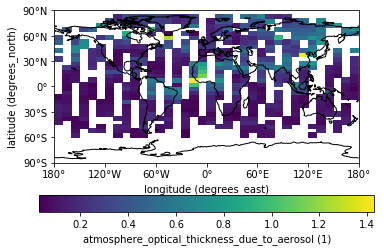

In [45]:
gridded_aerosol_cci_one_day[0].plot()

## Exercises

**1.** Read in ``AOD550`` and ``AOD670`` from the 5 days of satellite data 

**2.** Subset this data down to the region covered by the aircraft data

**3.** Try plotting ``AOD550`` against ``AOD670`` from the subsetted satellite data using a comparative scatter plot


## Collocation

<img src="../images/collocation_options.png" width="640"/>

### Model onto Aeronet

<img src="../images/model_onto_aeronet.png" width="640"/>

This is an gridded onto un-gridded collocation and can be done using either linear interpolation or nearest neighbour.

This is very quick and in general CIS can even handle hybrid height coordinates: 

<img src="../images/gridded_ungridded_collocation.png" width="640"/>

In [46]:
# Lets take a closer look at the model data
print(model_aod)

Optical thickness - total 550nm / (1) (time: 1464; latitude: 96; longitude: 192)
     Dimension coordinates:
          time                             x               -              -
          latitude                         -               x              -
          longitude                        -               -              x
     Attributes:
          CDI: Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.0
          advection: Lin & Rood
          date_time: 20140613 051140
          echam_version: 6.1.00
          grid_type: gaussian
          history: Fri Dec 04 17:15:40 2015: cdo -r copy od550aer.nc ../../temp.nc
Tue Jul...
          host_name: p101
          institution: Max-Planck-Institute for Meteorology
          jsbach_version: 2.01
          operating_system: AIX 6.1 Power6
          physics: Modified ECMWF physics
          radiation: Modified E

In [47]:
from cis.time_util import PartialDateTime
# First subset the aeronet data:
aeronet_aot_2008 = aeronet_aot_500.subset(t=PartialDateTime(2008))

Note that we don’t actually have to do this subsetting, but that otherwise CIS will interpolate the nearest values, which in this case we don’t really want.

In [48]:
# Now do the collocation:
model_aod_onto_aeronet = model_aod.collocated_onto(aeronet_aot_2008)

/opt/tljh/user/lib/python3.7/site-packages/numpy/ma/core.py:3225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


In [49]:
print(model_aod_onto_aeronet[0])

Ungridded data: Optical thickness - total 550nm / (1) 
     Shape = (1885,)

     Total number of points = 1885
     Number of non-masked points = 1885
     Long name = Optical thickness - total 550nm
     Standard name = None
     Units = 1
     Missing value = nan
     Range = (0.02192891966422272, 1.6932252635449034)
     History = 2020-09-16T14:30:20Z Collocated onto sampling from: [] 
using CIS version 1.7.2 
variables: od550aer 
with files: ['/mnt/efs/fs1/Data_Analysis_In_Python/Data/od550aer.nc'] 
using collocator: <cis.collocation.col_implementations.GriddedUngriddedCollocator object at 0x7fab7821c3c8> 
kernel: lin
     Coordinates: 
       longitude
          Long name = 
          Standard name = longitude
          Units = degrees_east
          Missing value = None
          Range = (4.350000000000023, 4.350000000000023)
          History = 
       latitude
          Long name = 
          Standard name = latitude
          Units = degrees_north
          Missing value = No

Note the updated history

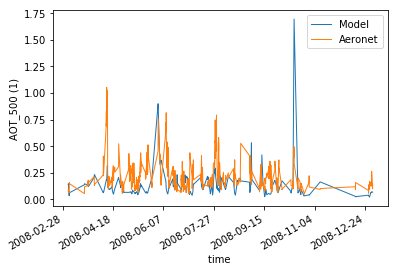

In [50]:
from cis.plotting.plot import multilayer_plot, taylor_plot
ax = multilayer_plot([model_aod_onto_aeronet[0], aeronet_aot_2008], 
                     layer_opts=[dict(label='Model'), 
                                 dict(label='Aeronet')], xaxis='time',
                    itemwidth=1)

(<cis.plotting.taylor.Taylor at 0x7fab6076fb00>,
 <matplotlib.axes._subplots.Floating AxesHostAxesSubplot at 0x7fab606fb2e8>)

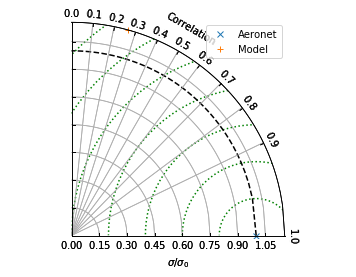

In [52]:
taylor_plot([aeronet_aot_2008, model_aod_onto_aeronet[0]], 
            layer_opts=[dict(label='Aeronet'),dict(label='Model')])

In [53]:
# Basic maths on the data
print(model_aod_onto_aeronet[0] - aeronet_aot_2008)

Ungridded data: Optical thickness - total 550nm / (1) 
     Shape = (1885,)

     Total number of points = 1885
     Number of non-masked points = 1885
     Long name = Optical thickness - total 550nm
     Standard name = None
     Units = 1
     Missing value = nan
     Range = (-0.8690231496872738, 1.3514322635449034)
     History = 2020-09-16T14:30:20Z Collocated onto sampling from: [] 
using CIS version 1.7.2 
variables: od550aer 
with files: ['/mnt/efs/fs1/Data_Analysis_In_Python/Data/od550aer.nc'] 
using collocator: <cis.collocation.col_implementations.GriddedUngriddedCollocator object at 0x7fab7821c3c8> 
kernel: lin
2020-09-16T14:36:04Z Performed unary_func operation
     Coordinates: 
       longitude
          Long name = 
          Standard name = longitude
          Units = degrees_east
          Missing value = None
          Range = (4.350000000000023, 4.350000000000023)
          History = 
       latitude
          Long name = 
          Standard name = latitude
        

### Aircraft onto satellite

<img src="../images/aircraft_onto_satellite.png" width="640"/>

As you can see the difficulty here is the sparseness of the aircraft data, and actually of the satellite data in this region.

This is an ungridded to ungridded collocation:

<img src="../images/ungridded_ungridded_collocation.png" width="640" />

In [54]:
# Read all of the AOD satelite variables
aerosol_cci = read_data_list(shared_data_path+'AerosolCCI', 'AOD*0')
aoerosol_cci_Alaska = aerosol_cci.subset(x=[-170,-100],y=[35,80])

In [55]:
print(aerosol_cci)

UngriddedDataList: 
0: Ungridded data: atmosphere_optical_thickness_due_to_aerosol / (1) 
1: Ungridded data: atmosphere_optical_thickness_due_to_aerosol / (1) 
2: Ungridded data: atmosphere_optical_thickness_due_to_aerosol / (1) 
3: Ungridded data: atmosphere_optical_thickness_due_to_aerosol / (1) 
Coordinates: 
  longitude
  latitude
  time



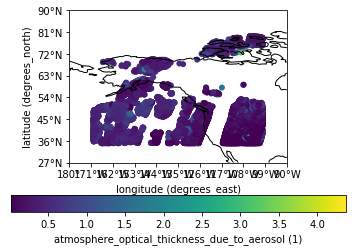

In [56]:
aoerosol_cci_Alaska[0].plot(yaxis='latitude')

In [62]:
aerosol_cci_collocated = aoerosol_cci_Alaska.collocated_onto(number_concentration, 
                                                             h_sep=10, t_sep='P1D')

In [63]:
aerosol_cci_collocated.append(number_concentration)
print(aerosol_cci_collocated)

UngriddedDataList: 
0: Ungridded data: atmosphere_optical_thickness_due_to_aerosol / (1) 
1: Ungridded data: Corrected sample standard deviation of aerosol optical thickness at 550 nm / (1) 
2: Ungridded data: Number of points used to calculate the mean of aerosol optical thickness at 550 nm / (unknown) 
3: Ungridded data: atmosphere_optical_thickness_due_to_aerosol / (1) 
4: Ungridded data: Corrected sample standard deviation of aerosol optical thickness at 870 nm / (1) 
5: Ungridded data: Number of points used to calculate the mean of aerosol optical thickness at 870 nm / (unknown) 
6: Ungridded data: atmosphere_optical_thickness_due_to_aerosol / (1) 
7: Ungridded data: Corrected sample standard deviation of aerosol optical thickness at 670 nm / (1) 
8: Ungridded data: Number of points used to calculate the mean of aerosol optical thickness at 670 nm / (unknown) 
9: Ungridded data: atmosphere_optical_thickness_due_to_aerosol / (1) 
10: Ungridded data: Corrected sample standard deviat

In [64]:
aerosol_cci_collocated = aerosol_cci_collocated[::3]

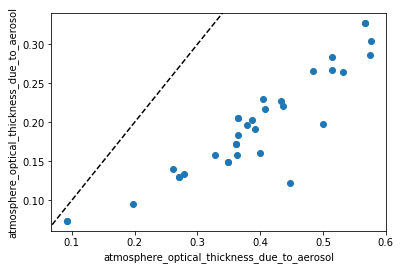

In [65]:
aerosol_cci_collocated[:2].plot('comparativescatter')

## Exercises

**1.** How does the correlation change if we only include those average number concentrations which averaged more than one point?

**2.** Consider the case of comparing our model AOD with the AerosolCCI.

**a.** What strategies could you employ?
    
**b.** Perform an initial assesment of the model AOD field using the Aerosol CCI data for the few days we have data.

## CIS and Pandas

In [ ]:
df = aerosol_cci_collocated.as_data_frame()
print(df)

In [ ]:
df.corr()
# Then do a pretty plot of it...
# This is a nice segway into the Pandas lesson.

In [ ]:
# Save the collocation output so that we can come back to it during the Pandas tutorial.
aerosol_cci_collocated.save_data('col_output.nc')